# **Introduction**

In [1]:
# import the necessary python libraries for data description purpose

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# read the stroke dataset , dataset link for download: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Check the missing values in the features
 
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# fill the missing values in the Body Mass Index variable with the average value.

df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# using label encoder to convert the categorical values of the features to numerical values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# **Data Visualization** 


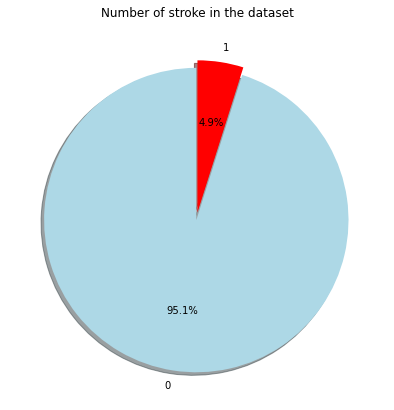

In [10]:
# Data visualization is done to understand the risk factors that influence the stroke occurrence

labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

0    4861
1     249
Name: stroke, dtype: int64


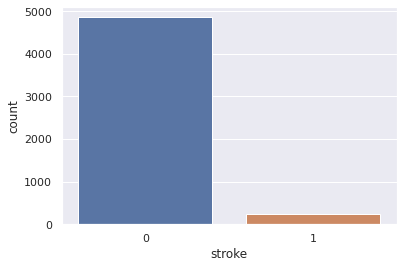

In [11]:
print(df.stroke.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='stroke')

0    2994
1    2115
2       1
Name: gender, dtype: int64


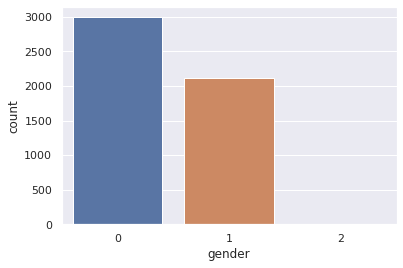

In [12]:
# Count plot

print(df.gender.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='gender')

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64


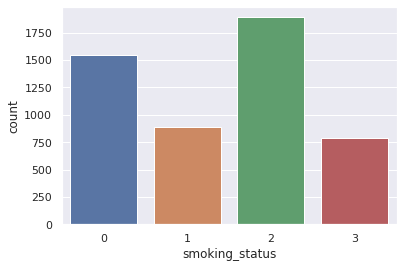

In [13]:
# Being a smoker or a formerly smoker increases your risk of having a stroke

print(df.smoking_status.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='smoking_status')

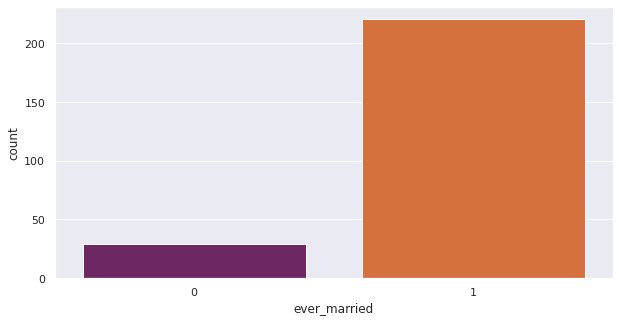

In [14]:
plt.figure(figsize=(10,5))
strok=df.loc[df['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno');

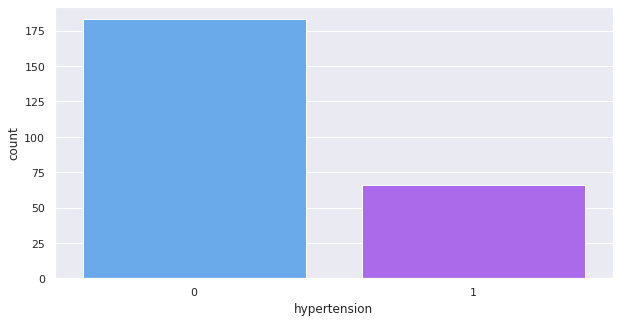

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='cool');

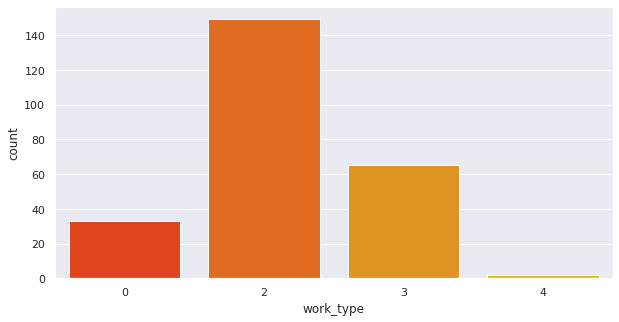

In [16]:
# Private work exposes you to more stroke

plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='autumn');

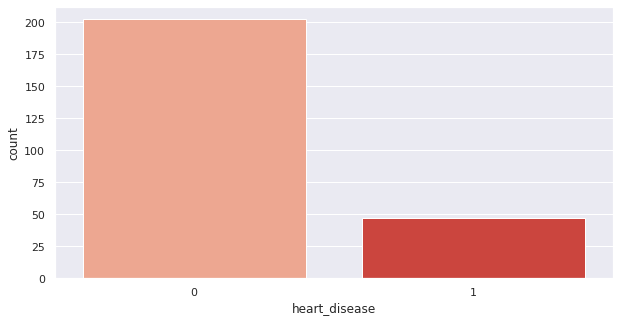

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds');

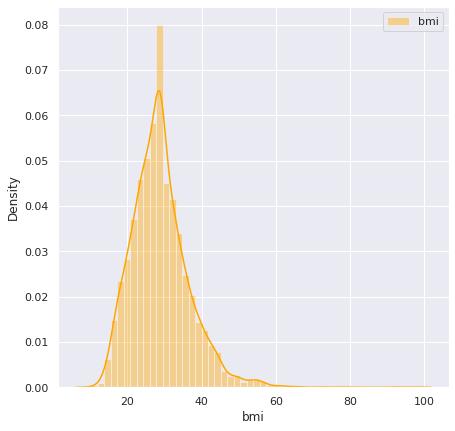

In [18]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.bmi,color='orange',label='bmi',kde=True)
plt.legend()

(10.0, 100.0)

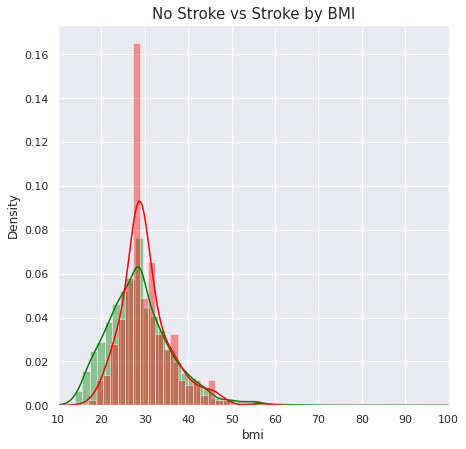

In [19]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['bmi'],color='green')
sns.distplot(df[df['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

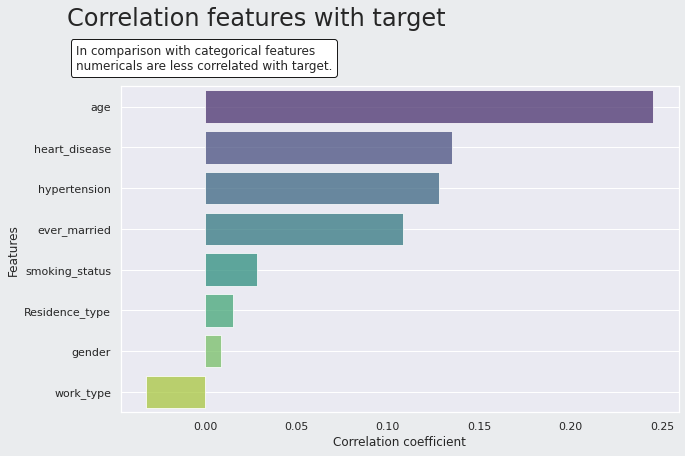

In [20]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = df["stroke"]
    x = df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)

 
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

title =  'Correlation features with target'
sub_title = 'In comparison with categorical features \
\nnumericals are less correlated with target.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

# Data Preprocessing

In [21]:
# import the encoders for handling categorical value's and SMOTE for class imbalance.  

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [22]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 10)
Y Shape (5110,)


In [23]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [24]:
# Splitting the dataset into two for training and testing the models

from sklearn.model_selection import train_test_split


In [25]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (4088, 19)
Number transations x_test df (1022, 19)
Number transations y_train df (4088,)
Number transations y_test df (1022,)


In [26]:
# smote application 

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

Before OverSampling, counts of label 1: 195
Before OverSampling, counts of label 0: 3893 

After OverSampling, the shape of train_x: (7786, 19)
After OverSampling, the shape of train_y: (7786,)
After OverSampling, counts of label 1: 3893
After OverSampling, counts of label 0: 3893


# Training and Testing 

In [27]:
pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [28]:
# import the necessary machine learning classifier's for the training 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [29]:
# performance metrics by which we will evaluate the models 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

from sklearn.model_selection import cross_val_score

In [30]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier()])
models.append(['LightGBM',LGBMClassifier()])
models.append(['Catboost',CatBoostClassifier()])
models.append(['Adaboost',AdaBoostClassifier()]) 
models.append(['MLP', MLPClassifier()])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)


Streaming output truncated to the last 5000 lines.
58:	learn: 0.1722460	total: 434ms	remaining: 6.91s
59:	learn: 0.1703201	total: 441ms	remaining: 6.91s
60:	learn: 0.1686475	total: 448ms	remaining: 6.89s
61:	learn: 0.1673019	total: 455ms	remaining: 6.88s
62:	learn: 0.1653336	total: 462ms	remaining: 6.87s
63:	learn: 0.1636841	total: 469ms	remaining: 6.86s
64:	learn: 0.1619585	total: 476ms	remaining: 6.84s
65:	learn: 0.1606607	total: 483ms	remaining: 6.83s
66:	learn: 0.1593471	total: 491ms	remaining: 6.83s
67:	learn: 0.1576759	total: 500ms	remaining: 6.85s
68:	learn: 0.1566163	total: 507ms	remaining: 6.84s
69:	learn: 0.1556211	total: 514ms	remaining: 6.83s
70:	learn: 0.1544341	total: 521ms	remaining: 6.81s
71:	learn: 0.1533989	total: 527ms	remaining: 6.8s
72:	learn: 0.1525553	total: 534ms	remaining: 6.78s
73:	learn: 0.1517617	total: 541ms	remaining: 6.77s
74:	learn: 0.1509187	total: 548ms	remaining: 6.75s
75:	learn: 0.1502101	total: 555ms	remaining: 6.74s
76:	learn: 0.1488846	total: 561m

In [31]:
# compile the results of testing of models in panda dataframe 

df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
7,XGBoost,94.618395,96.764621,7.229892,0.525712,0.428571,0.055556,0.098361
8,LightGBM,94.520548,96.944389,6.986720,0.525195,0.375000,0.055556,0.096774
6,Random Forest,94.422701,97.162683,6.762548,0.515936,0.285714,0.037037,0.065574
9,Catboost,94.227006,96.880171,7.049461,0.523646,0.272727,0.055556,0.092308
10,Adaboost,93.639922,95.929855,7.080809,0.529289,0.210526,0.074074,0.109589
5,Decision Tree,89.726027,94.927664,5.821712,0.578570,0.160000,0.222222,0.186047
4,BernoulliNB,84.442270,87.092872,3.878098,0.646847,0.152318,0.425926,0.224390
11,MLP,82.387476,85.653233,2.307699,0.627257,0.129412,0.407407,0.196429
2,KNeighbors,81.800391,89.121262,0.992939,0.676615,0.148936,0.518519,0.231405
0,Logistic Regreesion,77.690802,78.473787,1.689052,0.751090,0.154762,0.722222,0.254902


# Hyperparameter Tuning 

In [32]:
# We will tune the Classifier's using GridSearchCV to find out the best parameter that will enhance the accuracy 

from sklearn.model_selection import GridSearchCV
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error','auc'],'n_estimators':[100,150,200],'max_depth':[3,4,6,8,10]}]),
               (LGBMClassifier(),[{'learning_rate': [0.01, 1.0],'n_estimators':[100,150,200],'num_leaves': [24, 80]}]), 
               (CatBoostClassifier(),[{ 'depth':[3,1,2,6]}]),
               (AdaBoostClassifier(),[{'learning_rate':[0.1, 0.3],'n_estimators':[100,150,200]}])
              
              ]

In [33]:
# Fit the tuned models with the training dataset and chech their training accuracy 

for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

    

Streaming output truncated to the last 5000 lines.
16:	learn: 0.3564129	total: 139ms	remaining: 8.02s
17:	learn: 0.3430714	total: 145ms	remaining: 7.91s
18:	learn: 0.3358212	total: 151ms	remaining: 7.82s
19:	learn: 0.3258840	total: 158ms	remaining: 7.73s
20:	learn: 0.3152564	total: 164ms	remaining: 7.66s
21:	learn: 0.3088669	total: 171ms	remaining: 7.59s
22:	learn: 0.2987583	total: 177ms	remaining: 7.53s
23:	learn: 0.2909111	total: 184ms	remaining: 7.47s
24:	learn: 0.2847276	total: 190ms	remaining: 7.41s
25:	learn: 0.2784942	total: 197ms	remaining: 7.36s
26:	learn: 0.2726155	total: 206ms	remaining: 7.43s
27:	learn: 0.2668641	total: 213ms	remaining: 7.39s
28:	learn: 0.2613141	total: 223ms	remaining: 7.46s
29:	learn: 0.2564919	total: 239ms	remaining: 7.73s
30:	learn: 0.2516901	total: 246ms	remaining: 7.69s
31:	learn: 0.2470193	total: 253ms	remaining: 7.65s
32:	learn: 0.2423681	total: 260ms	remaining: 7.61s
33:	learn: 0.2378010	total: 266ms	remaining: 7.57s
34:	learn: 0.2345316	total: 273

# Testing Tuned Classifier's

In [38]:
# Choose the best values of hyperparameters from tuning and initialize it. 
Tunedmodels = []

Tunedmodels.append(['Decision Tree', DecisionTreeClassifier(criterion= 'entropy',random_state=0)])
Tunedmodels.append(['Random Forest', RandomForestClassifier(criterion= 'entropy', n_estimators= 100,random_state=0)])
Tunedmodels.append(['BernouliiNB', BernoulliNB(alpha = 0.25)])
Tunedmodels.append(['GaussianNB',GaussianNB(var_smoothing = 1e-09)])
Tunedmodels.append(['SVC', SVC(C=0.5, kernel='linear', random_state = 0)])
Tunedmodels.append(['KNeighbor',KNeighborsClassifier(metric='manhattan',n_neighbors=5)])
Tunedmodels.append(['Logistic regression',LogisticRegression(C=0.5,random_state=0)])
Tunedmodels.append(['XGBoost', XGBClassifier(eval_metric= 'error', learning_rate= 0.1,max_depth=8,n_estimators= 150)])
Tunedmodels.append(['LightGBM',LGBMClassifier(learning_rate= 0.01,n_estimators= 200,num_leaves=80)])
Tunedmodels.append(['Catboost',CatBoostClassifier(depth= 3)])
Tunedmodels.append(['Adaboost',AdaBoostClassifier(learning_rate= 0.3,n_estimators= 200)]) 

In [41]:
list_1= []

for n in range(len(Tunedmodels)):
    list_2= []
    model = Tunedmodels[n][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(Tunedmodels[n][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print(f'ROC AUC score: {roc_auc_score(y_test, y_pred)}')
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    list_2.append(Tunedmodels[n][0])
    list_2.append((accuracy_score(y_test, y_pred))*100) 
    list_2.append(roc)
    list_2.append(accuracies.mean()*100)
    list_2.append(accuracies.std()*100)
    list_2.append(precision)
    list_2.append(recall)
    list_2.append(f1)
    list_1.append(list_2)

Streaming output truncated to the last 5000 lines.
40:	learn: 0.2930066	total: 141ms	remaining: 3.3s
41:	learn: 0.2895362	total: 144ms	remaining: 3.29s
42:	learn: 0.2839925	total: 147ms	remaining: 3.28s
43:	learn: 0.2794890	total: 150ms	remaining: 3.27s
44:	learn: 0.2782735	total: 154ms	remaining: 3.26s
45:	learn: 0.2736898	total: 157ms	remaining: 3.26s
46:	learn: 0.2722767	total: 161ms	remaining: 3.26s
47:	learn: 0.2681730	total: 164ms	remaining: 3.25s
48:	learn: 0.2647915	total: 167ms	remaining: 3.25s
49:	learn: 0.2619029	total: 171ms	remaining: 3.25s
50:	learn: 0.2587638	total: 174ms	remaining: 3.24s
51:	learn: 0.2552142	total: 177ms	remaining: 3.23s
52:	learn: 0.2522400	total: 181ms	remaining: 3.23s
53:	learn: 0.2499493	total: 184ms	remaining: 3.22s
54:	learn: 0.2471036	total: 187ms	remaining: 3.21s
55:	learn: 0.2438022	total: 190ms	remaining: 3.2s
56:	learn: 0.2415361	total: 193ms	remaining: 3.19s
57:	learn: 0.2389223	total: 196ms	remaining: 3.19s
58:	learn: 0.2367807	total: 199ms

In [43]:
# Compile the results of testing of the tuned models in pandas dataframe 


df2 = pd.DataFrame(list_1, columns= ['Model', 'Accuracy', 'ROC AUC','K-Fold Mean Accuracy', 'Std. Deviation', 'Precision', 'Recall', 'F1'])
df2.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df2


,Model,Accuracy,ROC AUC,K-Fold Mean Accuracy,Std. Deviation,Precision,Recall,F1
7,XGBoost,94.618395,0.627257,97.047150,7.065129,0.444444,0.074074,0.126984
9,Catboost,94.520548,0.627257,96.880237,7.309531,0.375000,0.055556,0.096774
1,Random Forest,94.227006,0.627257,97.226917,6.954473,0.142857,0.018519,0.032787
8,LightGBM,94.031311,0.627257,96.482076,6.962656,0.266667,0.074074,0.115942
10,Adaboost,93.933464,0.627257,96.148183,7.199239,0.166667,0.037037,0.060606
0,Decision Tree,90.313112,0.627257,95.197092,5.622017,0.040816,0.037037,0.038835
5,KNeighbor,84.735812,0.627257,90.713937,0.535776,0.160000,0.444444,0.235294
2,BernouliiNB,84.442270,0.627257,87.092872,3.878098,0.152318,0.425926,0.224390
6,Logistic regression,77.592955,0.627257,78.640750,1.670351,0.151394,0.703704,0.249180
4,SVC,76.320939,0.627257,78.871997,1.748766,0.146617,0.722222,0.243750
